# Principal Components Analysis

PCA looks for dimensions of greatest variance

## The Principal Components Analysis Algorithm<cite data-cite="marsland2011machine"></cite>

Write $N$ datapoints $x_i = (x_{1i} , x_{2i} , . . . , x_{Mi} )$ as row vectors

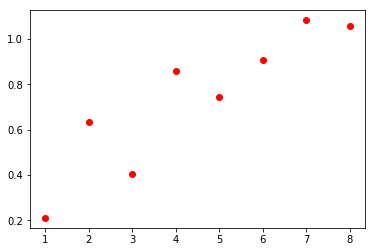

In [19]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(5)
x = np.arange(1, 9)
y = 0.1 * x + np.random.uniform(0, 0.5, 8)
plt.plot(x, y, "ro")
plt.show()

Put these vectors into a matrix $X$ (which will have size $N × M$ )

In [23]:
data=np.array([x,y])
data

array([[1.        , 2.        , 3.        , 4.        , 5.        ,
        6.        , 7.        , 8.        ],
       [0.21099659, 0.63536615, 0.40335958, 0.85930545, 0.74420559,
        0.90587193, 1.08295393, 1.05920899]])

In [24]:
data=data.T
data

array([[1.        , 0.21099659],
       [2.        , 0.63536615],
       [3.        , 0.40335958],
       [4.        , 0.85930545],
       [5.        , 0.74420559],
       [6.        , 0.90587193],
       [7.        , 1.08295393],
       [8.        , 1.05920899]])

Centre the data by subtracting off the mean of each column, putting it into matrix $B$

In [4]:
m = np.mean(data, axis=0)
data -=m

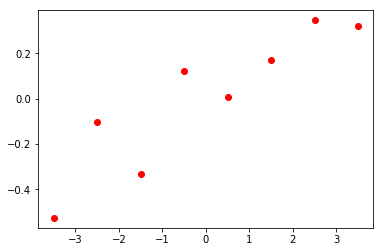

In [5]:
plt.plot(data[:,0], data[:,1], 'ro')
plt.show()

Compute the covariance matrix $C =\frac{1}{N}B^TB$

In [6]:
C = np.cov(data.T)
C

array([[6.        , 0.68341878],
       [0.68341878, 0.09505036]])

Compute the eigenvalues and eigenvectors of $C$, so $V^{-1} CV = D$, where $V$ holds the
eigenvectors of $C$ and $D$ is the $M × M$ diagonal eigenvalue matrix

In [7]:
evals,evecs = np.linalg.eig(C)

Sort the columns of $D$ into order of decreasing eigenvalues, and apply the same order
to the columns of $V$

In [8]:
indices = np.argsort(evals)
indices = indices[::-1]
evecs = evecs[:,indices]
evals = evals[indices]
evecs

array([[ 0.99353931, -0.11348852],
       [ 0.11348852,  0.99353931]])

Reject those with eigenvalue less than some $\eta$, leaving $L$ dimensions in the data

Produce the new data matrix

In [25]:
x = np.dot(np.transpose(evecs),np.transpose(data))

In [26]:
x

array([[1.017485  , 2.05918538, 3.0263946 , 4.07167853, 5.05215533,
        6.06404191, 7.07767799, 8.06852252],
       [0.09614488, 0.40428421, 0.06028804, 0.39979967, 0.17195491,
        0.21908825, 0.28153766, 0.14445761]])

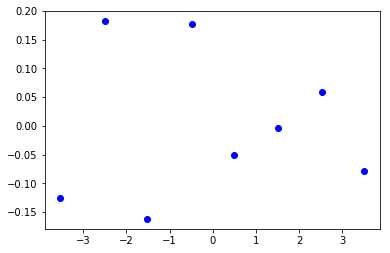

In [10]:
plt.plot(x[0], x[1], "bo")
plt.show()

## Observations

### Multiply a vector by $C$

In [11]:
def slope(x1, y1, x2, y2):
    m=(y2-y1)/(x2-x1)
    print('Slope: ', m)

In [12]:
v =  np.array([1, 3])
v = np.matmul(C, v)
slope(0,0,v[0],v[1])
print(v)

('Slope: ', 0.12031540626524392)
[8.05025634 0.96856986]


In [13]:
v = np.matmul(C, v)
slope(0,0,v[0],v[1])
print(v)

v = np.matmul(C, v)
slope(0,0,v[0],v[1])
print(v)

v = np.matmul(C, v)
slope(0,0,v[0],v[1])
print(v)

('Slope: ', 0.1142435065377625)
[48.9634769   5.59375929]
('Slope: ', 0.11422654958418434)
[297.60374153  33.99424854]
('Slope: ', 0.11422650219619285)
[1808.8547571   206.61915188]


The slope is converging to some value (that vector also happens to lay along the direction of the greatest variance)

### Finding Eigenvectors 
Find eigenvalues by solving: $det(\Sigma - \lambda I)$

$$det \begin{pmatrix}
  6.0 - \lambda & 0.68 \\
  0.68 & 0.09 - \lambda  
 \end{pmatrix} = (6.0-\lambda)(0.09-\lambda)-(0.68)(0.68)$$

In [14]:
from sympy.solvers import solve
from sympy import Symbol
x = Symbol('x')
solve((6-x)*(0.09-x)-(.68)*(.68), x)

[0.0127689731816278, 6.07723102681837]

Find $i^{th}$ eigenvector by solving: $\Sigma e_i = \lambda_i e_i$

$$ \begin{pmatrix}
  6.08 & 0.68 \\
  0.68 & 0.09  
 \end{pmatrix} 
 \begin{pmatrix}
  e_{1,1} \\
  e_{1,2}  
 \end{pmatrix} = 6.07 \begin{pmatrix}
  e_{1,1} \\
  e_{1,2}  
\end{pmatrix} 	$$

$$6.08e_{1,1} + 0.68e_{1,2} = 6.07e_{1,1} \\ 0.68e_{1,1} + 0.09e_{1,2} = 6.07e_{1,2}  $$

$$0.68e_{1,1} = 5.98e_{1,2} $$

$$ e_{1,1} = 8.7e_{1,2}$$

$$ e_1 \sim \begin{bmatrix}
8.7 \\
1
\end{bmatrix}
$$

want:  $$ ||e_1|| =1 $$

In [15]:
e =  np.array([8.7, 1])

In [16]:
m=np.linalg.norm(e)

In [17]:
eu=e/m
print(eu)

[0.99345885 0.11419067]


In [18]:
slope(0,0,eu[0],eu[1])

('Slope: ', 0.1149425287356322)


$$ e_1 \sim \begin{bmatrix}
0.99 \\
0.11
\end{bmatrix}
$$

$$1^{st} PC:  \begin{bmatrix}
  0.99 \\
  0.11  
 \end{bmatrix},  2^{nd} PC:  \begin{bmatrix}
  -0.11 \\
  0.99  
 \end{bmatrix}$$

## References
[
Machine Learning: An Algorithmic Perspective: Stephen Marsland ](http://dai.fmph.uniba.sk/courses/ICI/References/marsland.machine-learning.2ed.2015.pdf)